In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
gdf = gpd.read_file("C:/Users/ASUS/Desktop/geospatial/dataset_county.json")

In [3]:
gdf.head()

,province_name,county_name,geometry
0,استان اصفهان,شهرستان آران و بیدگل,"POLYGON ((51.84018 33.80494, 51.83851 33.80494..."
1,استان خراسان شمالی,شهرستان شیروان,"POLYGON ((58.00519 37.25363, 58.00464 37.25335..."
2,استان خراسان شمالی,شهرستان اسفراین,"POLYGON ((58.01964 36.583, 58.01686 36.5825, 5..."
3,استان ایلام,شهرستان ایوان,"POLYGON ((46.43437 33.67548, 46.43382 33.67548..."
4,استان ایلام,شهرستان آبدانان,"POLYGON ((47.95502 32.53292, 47.95444 32.53267..."


In [4]:
crs = 'EPSG:32637' #This CRS is used for areas located in Zone 37 North of the UTM system, which typically covers parts of East Africa and the Middle East.
gdf = gdf.to_crs(crs=crs)
gdf['area'] = gdf['geometry'].area
gdf.head()

,province_name,county_name,geometry,area
0,استان اصفهان,شهرستان آران و بیدگل,"POLYGON ((1692251.224 3815611.667, 1692095.504...",6.330994e+09
1,استان خراسان شمالی,شهرستان شیروان,"POLYGON ((2193342.191 4296663.294, 2193299.002...",4.195339e+09
2,استان خراسان شمالی,شهرستان اسفراین,"POLYGON ((2210271.19 4221469.957, 2210030.467 ...",5.299366e+09
3,استان ایلام,شهرستان ایوان,"POLYGON ((1189896.687 3751076.539, 1189844.952...",8.774355e+08
4,استان ایلام,شهرستان آبدانان,"POLYGON ((1342371.271 3635087.047, 1342318.767...",2.429459e+09


In [5]:
gdf.area

0      6.330994e+09
1      4.195339e+09
2      5.299366e+09
3      8.774355e+08
4      2.429459e+09
           ...     
427    5.261492e+09
428    2.750498e+09
429    3.201109e+09
430    5.604226e+08
431    1.986502e+07
Length: 432, dtype: float64

In [6]:
#convert the area to square kilometers
gdf['area_km2'] = gdf['area'] / 1000000
gdf = gdf.drop(columns = 'area')


In [7]:
gdf['county_name'] = gdf['county_name'].str.replace(r'^شهرستان\s+', '', regex=True)
gdf['province_name'] = gdf['province_name'].str.replace(r'^استان\s+', '', regex=True)

In [8]:
gdf.head()

,province_name,county_name,geometry,area_km2
0,اصفهان,آران و بیدگل,"POLYGON ((1692251.224 3815611.667, 1692095.504...",6330.993600
1,خراسان شمالی,شیروان,"POLYGON ((2193342.191 4296663.294, 2193299.002...",4195.338769
2,خراسان شمالی,اسفراین,"POLYGON ((2210271.19 4221469.957, 2210030.467 ...",5299.366002
3,ایلام,ایوان,"POLYGON ((1189896.687 3751076.539, 1189844.952...",877.435536
4,ایلام,آبدانان,"POLYGON ((1342371.271 3635087.047, 1342318.767...",2429.459122


In [9]:
gdf2 = pd.read_csv("C:/Users/ASUS/Desktop/geospatial/population2.csv")
gdf2 = gdf2.dropna(axis=1, how='all')

In [10]:
gdf2.head()

,id,استان,شهرستان,جمع,مرد,زن,شهری,روستایی
0,7,يزد,ابركوه,54.3,27.8,26.5,39.3,14.9
1,1,زنجان,ابهر,160.6,81.2,79.4,136.0,24.6
2,1,هرمزگان,ابوموسي,8.1,6.4,1.7,4.6,3.4
3,1,مرکزي,اراک,603.2,305.3,297.8,539.7,63.5
4,1,اردبيل,اردبيل,639.6,324.7,314.9,571.9,67.7


In [11]:
gdf2.dtypes

id           int64
استان       object
شهرستان     object
جمع         object
مرد         object
زن          object
شهری        object
روستایی    float64
dtype: object

In [12]:
gdf2.isnull().any()

id         False
استان      False
شهرستان    False
جمع        False
مرد        False
زن         False
شهری       False
روستایی    False
dtype: bool

In [13]:
#gdf2['جمع'] = gdf2['جمع'].astype(float) 
#found out that the commas between numbers prevented us from converting the data type to float

In [14]:
gdf2['جمع'] = gdf2['جمع'].astype(str)

In [15]:
gdf2['جمع'] = gdf2['جمع'].str.replace(',','')

In [16]:
gdf2['جمع'] = gdf2['جمع'].astype(float)

In [17]:
len(gdf)

432

In [18]:
len(gdf2)

469

In [19]:
gdf

,province_name,county_name,geometry,area_km2
0,اصفهان,آران و بیدگل,"POLYGON ((1692251.224 3815611.667, 1692095.504...",6330.993600
1,خراسان شمالی,شیروان,"POLYGON ((2193342.191 4296663.294, 2193299.002...",4195.338769
2,خراسان شمالی,اسفراین,"POLYGON ((2210271.19 4221469.957, 2210030.467 ...",5299.366002
3,ایلام,ایوان,"POLYGON ((1189896.687 3751076.539, 1189844.952...",877.435536
4,ایلام,آبدانان,"POLYGON ((1342371.271 3635087.047, 1342318.767...",2429.459122
...,...,...,...,...
427,گلستان,گنبد کاووس,"POLYGON ((1922379.859 4225206.188, 1922358.538...",5261.491986
428,کرمانشاه,گیلانغرب,"POLYGON ((1120814.446 3748059.991, 1120706.993...",2750.497532
429,کهگیلویه و بویر احمد,گچساران,"POLYGON ((1623591.529 3369834.75, 1623567.428 ...",3201.109398
430,فارس,اشکنان,"POLYGON ((1949512.093 3089120.749, 1949487.541...",560.422592


In [20]:
gdf['county_name'] = (
    gdf['county_name']
    .str.replace('\u200c', '', regex=False) 
    .str.replace(' ', '', regex=False) 
    .str.replace('ئ','ی', regex=False)  
    .str.replace('ي', 'ی', regex=False) 
    .str.replace('ك', 'ک', regex=False) 
    .str.strip()                         
)
gdf2['شهرستان'] = (
    gdf2['شهرستان']
    .str.replace('\u200c', '', regex=False)
    .str.replace(' ', '', regex=False) 
    .str.replace('ي', 'ی', regex=False) 
    .str.replace('ئ','ی', regex=False)  
    .str.replace('ك', 'ک', regex=False) 
    .str.strip()                         
)

In [21]:
gdf = gdf.merge(gdf2[['شهرستان', 'جمع']], left_on='county_name', right_on='شهرستان', how='left')
gdf = gdf.drop(columns='شهرستان')
gdf = gdf.rename(columns={'جمع': 'population'})

In [22]:
gdf.fillna(0, inplace=True)
gdf['population'] = gdf['population']*100

In [23]:
gdf[gdf['population'] == 0]

,province_name,county_name,geometry,area_km2,population
26,هرمزگان,بوموسی,"POLYGON ((2154573.302 2986074.474, 2144194.79 ...",10586.775637,0.0
128,هرمزگان,حاجیآباد,"POLYGON ((2275788.516 3203969.621, 2275680.897...",10136.001351,0.0
169,لرستان,دوره,"POLYGON ((1360799.374 3726423.081, 1360572.298...",1447.282776,0.0
250,سمنان,شهمیرزاد,"POLYGON ((1805064.595 4056577.04, 1804585.207 ...",1450.353585,0.0
264,گلستان,علیآباد,"POLYGON ((1929578.176 4182957.477, 1929583.512...",1170.137035,0.0
389,خوزستان,هفتگل,"POLYGON ((1514167.599 3518490.505, 1514094.622...",1453.553041,0.0
410,سیستان و بلوچستان,چابهار,"POLYGON ((2816954.447 2946457.789, 2800521.546...",11868.742704,0.0
430,فارس,اشکنان,"POLYGON ((1949512.093 3089120.749, 1949487.541...",560.422592,0.0
431,0,Cəbrayılrayonu,"POLYGON ((1217215.269 4392402.289, 1217102.879...",19.865017,0.0


In [24]:
population_updates = {
    26: 7402,   
    128: 28977,
    169: 1703,
    250: 11191,
    264: 52838,
    389: 15802,
    410: 106739,
    430: 9115
}
for index, population in population_updates.items():
    gdf.loc[index, 'population'] = population

In [25]:
gdf[gdf['population'] == 0]

,province_name,county_name,geometry,area_km2,population
431,0,Cəbrayılrayonu,"POLYGON ((1217215.269 4392402.289, 1217102.879...",19.865017,0.0


now we have a clean data

In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(gdf.describe())

       area_km2  population
count    432.00      432.00
mean    4150.43    19500.55
std     5793.07    52360.19
min       19.87        0.00
25%     1320.36     4955.00
50%     2399.80     9010.00
75%     4868.98    16700.00
max    59024.64   903950.00


<Axes: >

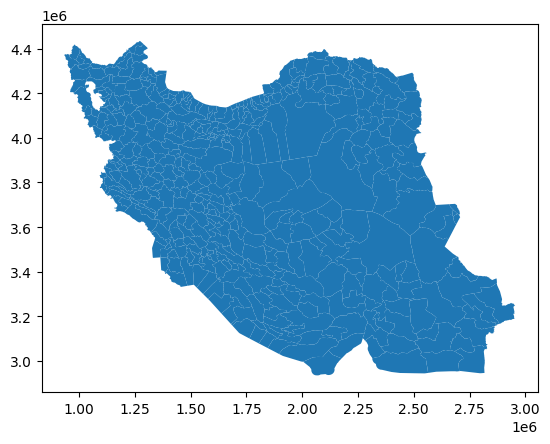

In [27]:
gdf.plot()

In [28]:
gdf.loc[431, 'county_name'] = 'دریاچه ارومیه'

In [29]:
gdf[gdf['population'] == 0]

,province_name,county_name,geometry,area_km2,population
431,0,دریاچه ارومیه,"POLYGON ((1217215.269 4392402.289, 1217102.879...",19.87,0.00


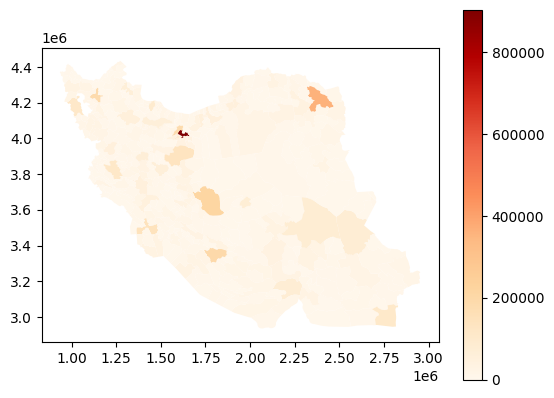

In [30]:
import matplotlib.pyplot as plt

gdf.plot(column='population', cmap='OrRd', legend=True)
plt.show()


In [31]:
gdf['density'] = gdf['population'] / gdf['area_km2']

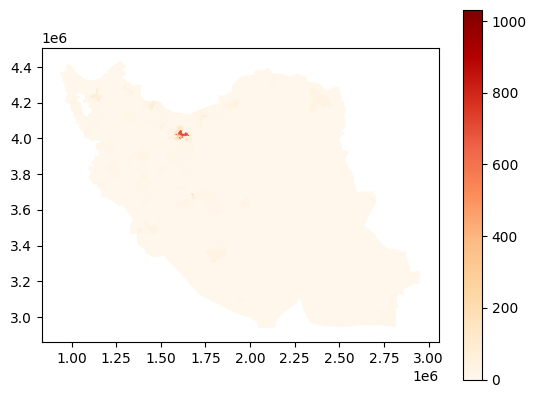

In [32]:
gdf.plot(column='density', cmap='OrRd', legend=True)
plt.show()

In [33]:
gdf3 = pd.read_csv("C:/Users/ASUS/Desktop/geospatial/marakez_ostan_csv.csv")

In [34]:
gdf3

,name,capital
0,استان کرمانشاه,کرمانشاه
1,استان کهگیلویه و بویر احمد,یاسوج
2,استان سمنان,سمنان
3,استان قم,قم
4,استان البرز,کرج
5,استان سیستان و بلوچستان,زاهدان
6,استان خراسان جنوبی,بیرجند
7,استان مرکزی,اراک
8,استان کرمان,کرمان
9,استان بوشهر,بوشهر


In [35]:
gdf3['name'] = gdf3['name'].str.replace('استان','')

In [36]:
gdf3['name'] = gdf3['name'].str.strip()
gdf = gdf.merge(gdf3[['name', 'capital']], left_on='province_name', right_on='name', how='left')
gdf = gdf.rename(columns={'capital': 'province_capital'})

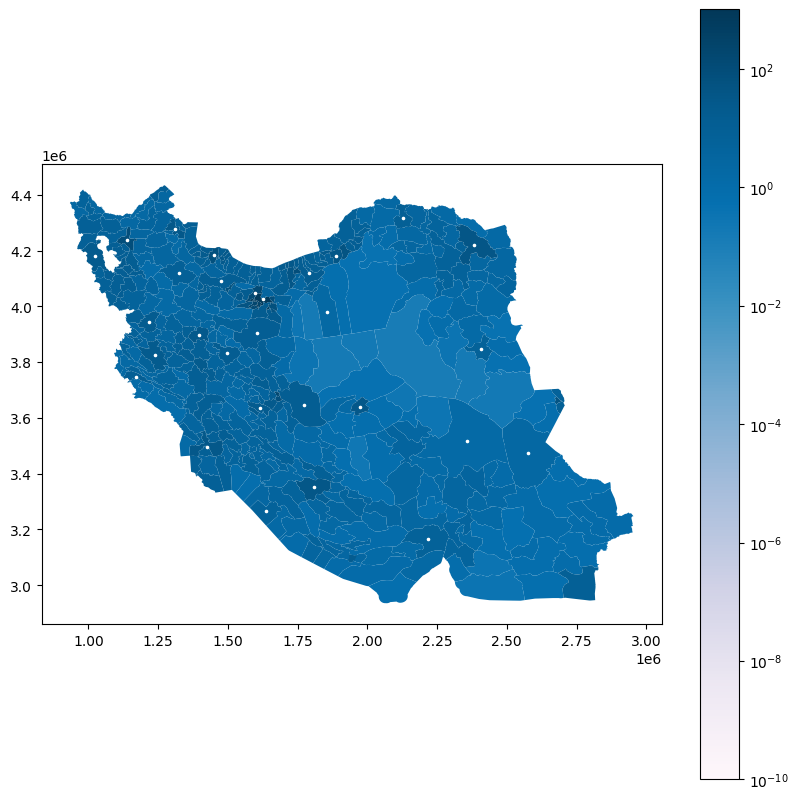

In [37]:
from matplotlib.colors import LogNorm
gdf['density'] = gdf['density'].replace(0, 1e-10)
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, column='density', cmap='PuBu', legend=True, norm=LogNorm(vmin=gdf['density'].min(), vmax=gdf['density'].max()))
gdf['is_capital'] = gdf.apply(lambda row: row['county_name'] == row['province_capital'], axis =1)
gdf['is_capital']
centroids = gdf[gdf['is_capital']].centroid

ax.scatter(centroids.x, centroids.y, color='white', marker='.', s=10)

plt.show()

In [38]:
gdf['county_centroid'] = gdf.centroid
province_capital_centroids = gdf.set_index('county_name')['county_centroid'].to_dict()
print(province_capital_centroids)
gdf['province_capital_centroid'] = gdf['province_capital'].map(province_capital_centroids)
#In this section I tried to figure out the location of each capital' province to calculate the distance =)

{'آرانوبیدگل': <POINT (1690193.941 3857370.937)>, 'شیروان': <POINT (2176397.713 4326984.416)>, 'اسفراین': <POINT (2159920.245 4254637.388)>, 'ایوان': <POINT (1163276.496 3772416.401)>, 'آبدانان': <POINT (1301022.931 3666912.634)>, 'دهلران': <POINT (1278191.265 3644119.955)>, 'درهشهر': <POINT (1302021.172 3686729.567)>, 'مهران': <POINT (1180427.645 3701384.95)>, 'چالدران': <POINT (964806.617 4341438.939)>, 'سقز': <POINT (1164259.021 4026735.85)>, 'بانه': <POINT (1117840.41 4005389.093)>, 'آبادان': <POINT (1440986.994 3370814.146)>, 'آباده': <POINT (1792010.789 3538314.251)>, 'آبیک': <POINT (1523275.126 4053958.156)>, 'آذرشهر': <POINT (1108707.194 4198313.281)>, 'آرادان': <POINT (1749736.34 3948190.809)>, 'آزادشهر': <POINT (1959427.986 4220835.98)>, 'آستارا': <POINT (1364327.751 4291779.056)>, 'آستانهاشرفیه': <POINT (1476028.458 4195036.899)>, 'آشتیان': <POINT (1517590.249 3866201.863)>, 'آغاجاری': <POINT (1546719.095 3453016.763)>, 'آققلا': <POINT (1883228.438 4227860.354)>, 'آمل': <POI

In [39]:
gdf[gdf['province_capital_centroid'].isna()]

,province_name,county_name,geometry,area_km2,population,density,name,province_capital,is_capital,county_centroid,province_capital_centroid
35,لرستان,ازنا,"POLYGON ((1477173.508 3726321.492, 1477042.235...",1431.31,7730.00,5.40,لرستان,خرم آباد,False,POINT (1471937.917 3756785.578),NaN
47,لرستان,الیگودرز,"POLYGON ((1494873.99 3678214.588, 1494350.041 ...",5445.79,13740.00,2.52,لرستان,خرم آباد,False,POINT (1473770.196 3713985.575),NaN
62,کهگیلویه و بویر احمد,باشت,"POLYGON ((1683920.303 3413863.394, 1683896.815...",1090.54,2170.00,1.99,کهگیلویه و بویر احمد,یاسوج,False,POINT (1662920.327 3432191.698),NaN
73,لرستان,بروجرد,"POLYGON ((1410038.91 3762827.481, 1409875.311 ...",1653.32,33350.00,20.17,لرستان,خرم آباد,False,POINT (1403805.854 3793323.783),NaN
92,کهگیلویه و بویر احمد,بهمیی,"POLYGON ((1594107.865 3455874.674, 1593908.836...",1298.59,3720.00,2.86,کهگیلویه و بویر احمد,یاسوج,False,POINT (1565270.562 3484392.444),NaN
98,کهگیلویه و بویر احمد,بویراحمد,"POLYGON ((1736597.534 3437953.76, 1736523.778 ...",4356.76,31060.00,7.13,کهگیلویه و بویر احمد,یاسوج,False,POINT (1674726.037 3475908.679),NaN
135,لرستان,خرمآباد,"POLYGON ((1382194.281 3687065.74, 1382067.755 ...",5152.62,52830.00,10.25,لرستان,خرم آباد,False,POINT (1391726.373 3735883.594),NaN
162,لرستان,دلفان,"POLYGON ((1332919.858 3783480.73, 1332794.896 ...",2785.51,14540.00,5.22,لرستان,خرم آباد,False,POINT (1315413.48 3804293.839),NaN
166,کهگیلویه و بویر احمد,دنا,"POLYGON ((1696142.604 3472546.55, 1695906.787 ...",1160.09,4300.00,3.71,کهگیلویه و بویر احمد,یاسوج,False,POINT (1674724.527 3496864.161),NaN
169,لرستان,دوره,"POLYGON ((1360799.374 3726423.081, 1360572.298...",1447.28,1703.00,1.18,لرستان,خرم آباد,False,POINT (1332023.574 3752965.002),NaN


In [40]:
gdf.loc[gdf['province_capital'] == 'خرم آباد', 'province_capital'] = 'خرمآباد'

gdf.loc[gdf['county_name'] == 'بویراحمد', 'county_name'] = 'یاسوج'

In [41]:
gdf['county_centroid'] = gdf.centroid
province_capital_centroids = gdf.set_index('county_name')['county_centroid'].to_dict()
print(province_capital_centroids)
gdf['province_capital_centroid'] = gdf['province_capital'].map(province_capital_centroids)

{'آرانوبیدگل': <POINT (1690193.941 3857370.937)>, 'شیروان': <POINT (2176397.713 4326984.416)>, 'اسفراین': <POINT (2159920.245 4254637.388)>, 'ایوان': <POINT (1163276.496 3772416.401)>, 'آبدانان': <POINT (1301022.931 3666912.634)>, 'دهلران': <POINT (1278191.265 3644119.955)>, 'درهشهر': <POINT (1302021.172 3686729.567)>, 'مهران': <POINT (1180427.645 3701384.95)>, 'چالدران': <POINT (964806.617 4341438.939)>, 'سقز': <POINT (1164259.021 4026735.85)>, 'بانه': <POINT (1117840.41 4005389.093)>, 'آبادان': <POINT (1440986.994 3370814.146)>, 'آباده': <POINT (1792010.789 3538314.251)>, 'آبیک': <POINT (1523275.126 4053958.156)>, 'آذرشهر': <POINT (1108707.194 4198313.281)>, 'آرادان': <POINT (1749736.34 3948190.809)>, 'آزادشهر': <POINT (1959427.986 4220835.98)>, 'آستارا': <POINT (1364327.751 4291779.056)>, 'آستانهاشرفیه': <POINT (1476028.458 4195036.899)>, 'آشتیان': <POINT (1517590.249 3866201.863)>, 'آغاجاری': <POINT (1546719.095 3453016.763)>, 'آققلا': <POINT (1883228.438 4227860.354)>, 'آمل': <POI

In [42]:
gdf[gdf['province_capital_centroid'].isna()]

,province_name,county_name,geometry,area_km2,population,density,name,province_capital,is_capital,county_centroid,province_capital_centroid
431,0,دریاچه ارومیه,"POLYGON ((1217215.269 4392402.289, 1217102.879...",19.87,0.00,0.00,NaN,NaN,False,POINT (1213928.216 4392862.271),NaN


In [43]:
from shapely.geometry import Point
gdf_filtered = gdf[gdf['population'] > 1].copy()
gdf_filtered['distance_to_capital'] = gdf_filtered.apply(
    lambda row: row['county_centroid'].distance(row['province_capital_centroid']) if pd.notna(row['county_centroid']) and pd.notna(row['province_capital_centroid']) else None,
    axis=1
)
#Better to get rid of "دریاچه ارومیه" to avoid dealing with errors.

In [44]:
gdf_filtered

,province_name,county_name,geometry,area_km2,population,density,name,province_capital,is_capital,county_centroid,province_capital_centroid,distance_to_capital
0,اصفهان,آرانوبیدگل,"POLYGON ((1692251.224 3815611.667, 1692095.504...",6330.99,10920.00,1.72,اصفهان,اصفهان,False,POINT (1690193.941 3857370.937),POINT (1771544.9536347722 3647911.207526506),224702.84
1,خراسان شمالی,شیروان,"POLYGON ((2193342.191 4296663.294, 2193299.002...",4195.34,14210.00,3.39,خراسان شمالی,بجنورد,False,POINT (2176397.713 4326984.416),POINT (2127022.541781274 4318213.051526288),50148.22
2,خراسان شمالی,اسفراین,"POLYGON ((2210271.19 4221469.957, 2210030.467 ...",5299.37,11830.00,2.23,خراسان شمالی,بجنورد,False,POINT (2159920.245 4254637.388),POINT (2127022.541781274 4318213.051526288),71582.99
3,ایلام,ایوان,"POLYGON ((1189896.687 3751076.539, 1189844.952...",877.44,4960.00,5.65,ایلام,ایلام,False,POINT (1163276.496 3772416.401),POINT (1169630.6228640731 3746472.203048189),26710.98
4,ایلام,آبدانان,"POLYGON ((1342371.271 3635087.047, 1342318.767...",2429.46,4830.00,1.99,ایلام,ایلام,False,POINT (1301022.931 3666912.634),POINT (1169630.6228640731 3746472.203048189),153602.29
...,...,...,...,...,...,...,...,...,...,...,...,...
426,بوشهر,گناوه,"POLYGON ((1655151.303 3297555.526, 1655216.142...",4592.54,10950.00,2.38,بوشهر,بوشهر,False,POINT (1610912.479 3319075.962),POINT (1637164.2179384788 3264493.6216546157),60567.20
427,گلستان,گنبدکاووس,"POLYGON ((1922379.859 4225206.188, 1922358.538...",5261.49,36940.00,7.02,گلستان,گرگان,False,POINT (1927003.152 4281434.341),POINT (1888869.6296440524 4181192.5069011115),107250.13
428,کرمانشاه,گیلانغرب,"POLYGON ((1120814.446 3748059.991, 1120706.993...",2750.50,5270.00,1.92,کرمانشاه,کرمانشاه,False,POINT (1144408.81 3792005.253),POINT (1237988.129360804 3824496.1020596474),99059.30
429,کهگیلویه و بویر احمد,گچساران,"POLYGON ((1623591.529 3369834.75, 1623567.428 ...",3201.11,12830.00,4.01,کهگیلویه و بویر احمد,یاسوج,False,POINT (1633527.932 3410339.864),POINT (1674726.0374107624 3475908.678718239),77437.42


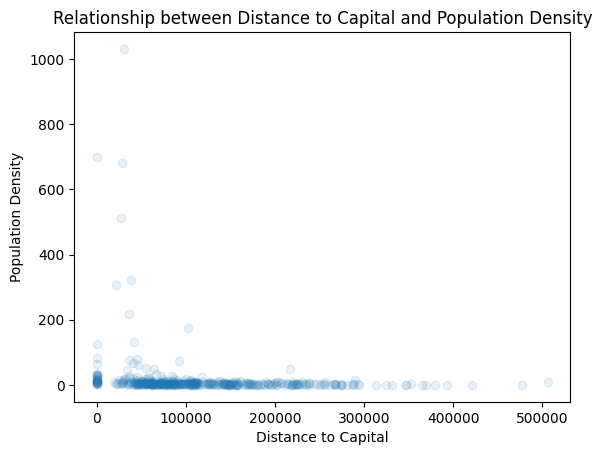

In [45]:
sizes = gdf_filtered['population'] 
colors = gdf_filtered['distance_to_capital']  
plt.scatter(gdf_filtered['distance_to_capital'], gdf_filtered['density'], alpha=.1)
plt.xlabel('Distance to Capital')
plt.ylabel('Population Density')
plt.title('Relationship between Distance to Capital and Population Density')
plt.show()
#I can't see any important linear relationship

In [46]:
gdf_filtered[['density', 'distance_to_capital']].describe()

,density,distance_to_capital
count,431.00,431.00
mean,16.78,114546.04
std,76.85,85076.21
min,0.13,0.00
25%,1.70,55824.35
50%,3.90,93042.59
75%,8.34,155427.89
max,1031.07,506101.07


In [47]:
gdf_filtered['density'].corr(gdf_filtered['distance_to_capital'])


-0.1725611047827032

In [48]:
#such a poor corr

In [49]:
pd.qcut(gdf_filtered['distance_to_capital'], 4)

0      (155427.885, 506101.069]
1           (-0.001, 55824.345]
2        (55824.345, 93042.593]
3           (-0.001, 55824.345]
4       (93042.593, 155427.885]
                 ...           
426      (55824.345, 93042.593]
427     (93042.593, 155427.885]
428     (93042.593, 155427.885]
429      (55824.345, 93042.593]
430    (155427.885, 506101.069]
Name: distance_to_capital, Length: 431, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 55824.345] < (55824.345, 93042.593] < (93042.593, 155427.885] < (155427.885, 506101.069]]

In [50]:
import pandas as pd
bins = [0, 55824.345, 93042.593, 155427.885, float('inf')] 
labels = ['Close', 'Medium', 'Far', 'Very Far']
gdf_filtered['distance_category'] = pd.cut(gdf_filtered['distance_to_capital'], bins=bins, labels=labels, right=True)


In [51]:
#anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('density ~ C(distance_category)', data=gdf_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                         sum_sq     df    F  PR(>F)
C(distance_category)  142081.98   3.00 9.82    0.00
Residual             1910195.56 396.00  NaN     NaN


In [61]:
gdf_filtered[gdf_filtered['distance_category']== "nan"]

,province_name,county_name,geometry,area_km2,population,density,name,province_capital,is_capital,county_centroid,province_capital_centroid,distance_to_capital,distance_category
27,مرکزی,اراک,"POLYGON ((1533404.474 3811876.285, 1532780.683...",4190.08,60320.00,14.40,مرکزی,اراک,True,POINT (1498371.778 3831142.894),POINT (1498371.7778630264 3831142.894297677),0.00,nan
28,اردبیل,اردبیل,"POLYGON ((1343242.066 4241916.71, 1342573.081 ...",2201.09,63960.00,29.06,اردبیل,اردبیل,True,POINT (1312025.621 4275942.664),POINT (1312025.620535992 4275942.663856226),0.00,nan
34,آذربایجان غربی,ارومیه,"POLYGON ((1062584.189 4129182.294, 1062435.884...",5310.89,110920.00,20.89,آذربایجان غربی,ارومیه,True,POINT (1023305.362 4179833.516),POINT (1023305.362359899 4179833.515824301),0.00,nan
44,اصفهان,اصفهان,"POLYGON ((1816446.572 3568285.054, 1816393.017...",16335.32,217870.00,13.34,اصفهان,اصفهان,True,POINT (1771544.954 3647911.208),POINT (1771544.9536347722 3647911.207526506),0.00,nan
54,خوزستان,اهواز,"POLYGON ((1456697.105 3462491.209, 1456378.33 ...",4884.28,142010.00,29.07,خوزستان,اهواز,True,POINT (1426140.753 3496228.075),POINT (1426140.7526764947 3496228.0753263757),0.00,nan
58,ایلام,ایلام,"POLYGON ((1230053.222 3718810.769, 1229890.545...",2007.90,24010.00,11.96,ایلام,ایلام,True,POINT (1169630.623 3746472.203),POINT (1169630.6228640731 3746472.203048189),0.00,nan
68,خراسان شمالی,بجنورد,"POLYGON ((2102875.563 4281508.256, 2102991.052...",3752.99,34490.00,9.19,خراسان شمالی,بجنورد,True,POINT (2127022.542 4318213.052),POINT (2127022.541781274 4318213.051526288),0.00,nan
84,هرمزگان,بندرعباس,"POLYGON ((2203407.197 3106082.94, 2197226.651 ...",11431.52,75050.00,6.57,هرمزگان,بندرعباس,True,POINT (2218184.546 3164575.449),POINT (2218184.545800706 3164575.4493276267),0.00,nan
96,بوشهر,بوشهر,"POLYGON ((1637844.812 3212768.645, 1615043.205...",5614.22,32490.00,5.79,بوشهر,بوشهر,True,POINT (1637164.218 3264493.622),POINT (1637164.2179384788 3264493.6216546157),0.00,nan
98,کهگیلویه و بویر احمد,یاسوج,"POLYGON ((1736597.534 3437953.76, 1736523.778 ...",4356.76,31060.00,7.13,کهگیلویه و بویر احمد,یاسوج,False,POINT (1674726.037 3475908.679),POINT (1674726.0374107624 3475908.678718239),0.00,nan


In [64]:
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
gdf_filtered.loc[gdf_filtered['distance_category'] == 'nan', 'distance_category'] = 'CAP' #capitals has 0 distance with themselves =)

mc = MultiComparison(gdf_filtered['density'], gdf_filtered['distance_category'])
mc.allpairtest(stats.ttest_ind, method='bonf')


(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[-2.64395036e-01,  7.91988926e-01],
         [ 3.14822654e+00,  2.01929472e-03],
         [ 3.16859148e+00,  1.88935947e-03],
         [ 3.50026090e+00,  6.27638700e-04],
         [ 3.07654254e+00,  2.41751086e-03],
         [ 3.05894860e+00,  2.55469906e-03],
         [ 3.30636468e+00,  1.13754161e-03],
         [-3.90590010e-01,  6.96490673e-01],
         [ 1.70826412e+00,  8.90441587e-02],
         [ 3.43377118e+00,  7.14648028e-04]]),
  array([False,  True,  True,  True,  True,  True,  True, False, False,
          True]),
  array([1.        , 0.02019295, 0.01889359, 0.00627639, 0.02417511,
         0.02554699, 0.01137542, 1.        , 0.89044159, 0.00714648]),
  0.005116196891823743,
  0.005),
 array([('CAP', 'Close', -0.2644, 7.920e-01, 1.    , False),
        ('CAP', 'Far',  3.1482, 2.000e-03, 0.0202,  True),
        ('CAP', 'Medium',  3.1686, 1.900e-03, 0.0189,  True),
        ('CAP', 'Very Far',  3.5003, 6.000e-04, 0.0063

The comparisons reveal significant differences between 
'Close' and 'Far'
'Close' and 'Medium'
'Close' and 'Very Far'
'Far' and 'CAP'
'Medium' and 'Very Far'
'Medium' and 'CAP'
'Very Far' and 'CAP'
So Based on the results, we can infer that the density of provincial capitals and counties near the provinces is statistically similar, indicating that their densities are approximately equal. Also, the density of other counties (such as those very far from the provinces) shows significant differences compared to the densities of provincial capitals and cities near the provinces. Therefore, it can be concluded that the densities of provincial capitals and nearby counties are similar, while the densities of more distant counties differ significantly from these two groups.